# Predicting Financial Time Series Data with Machine Learning

This is a sample that predicts future binary behaviour from past price movements.
Here we implement it with USD/CAD rate as an example, but you can convert it to other market prices by getting other csv files.

**Ianca Leite**


## Importing Libraries

In [1]:
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier

## Structuring data

In [2]:
h = pd.read_csv('USDCAD_Candlestick_1_Hour_BID_31.12.2015-31.05.2018.csv')

Let's put the USD/CAD hour data into a **Pandas Dataframe**

In [3]:
df = pd.DataFrame(h)
display(df.head())
display(df.tail())

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2016 00:00:00.000,1.38326,1.38326,1.38326,1.38326,0.0
1,01.01.2016 01:00:00.000,1.38326,1.38326,1.38326,1.38326,0.0
2,01.01.2016 02:00:00.000,1.38326,1.38326,1.38326,1.38326,0.0
3,01.01.2016 03:00:00.000,1.38326,1.38326,1.38326,1.38326,0.0
4,01.01.2016 04:00:00.000,1.38326,1.38326,1.38326,1.38326,0.0


,Gmt time,Open,High,Low,Close,Volume
15116,31.05.2018 19:00:00.000,1.29566,1.29671,1.29541,1.29666,5.330320e+09
15117,31.05.2018 20:00:00.000,1.29668,1.29682,1.29502,1.29563,3.116830e+09
15118,31.05.2018 21:00:00.000,1.29563,1.29577,1.29498,1.29564,1.456650e+09
15119,31.05.2018 22:00:00.000,1.29563,1.29563,1.29407,1.29409,1.370330e+09
15120,31.05.2018 23:00:00.000,1.29409,1.29469,1.29406,1.29436,1.259850e+09


We can have a quick look at the data using *describe*:

In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,15121.000000,15121.000000,15121.000000,15121.000000,1.512100e+04
mean,1.304673,1.305609,1.303732,1.304668,7.468546e+09
std,0.042932,0.043035,0.042843,0.042928,7.376074e+09
min,1.206650,1.207530,1.206110,1.206650,0.000000e+00
25%,1.274700,1.275740,1.273850,1.274710,3.432900e+09
50%,1.302150,1.303100,1.301030,1.302100,5.657690e+09
75%,1.332820,1.333680,1.332170,1.332800,8.530470e+09
max,1.468360,1.468980,1.463760,1.468420,1.809803e+11


Let's add extra data! Considering USA and Canada international relationship, could we add something about oil?

In [5]:
o = pd.read_csv('BRENT.CMDUSD_Candlestick_1_Hour_BID_31.12.2014-31.05.2018.csv')

In [6]:
df_oil = pd.DataFrame(o)
display(df_oil.head())
display(df_oil.tail())

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2015 00:00:00.000,56.83,56.83,56.83,56.83,0.0
1,01.01.2015 01:00:00.000,56.83,56.83,56.83,56.83,0.0
2,01.01.2015 02:00:00.000,56.83,56.83,56.83,56.83,0.0
3,01.01.2015 03:00:00.000,56.83,56.83,56.83,56.83,0.0
4,01.01.2015 04:00:00.000,56.83,56.83,56.83,56.83,0.0


,Gmt time,Open,High,Low,Close,Volume
21380,31.05.2018 19:00:00.000,77.835,77.865,77.625,77.655,102294.9964
21381,31.05.2018 20:00:00.000,77.655,77.788,77.535,77.725,125650.0036
21382,31.05.2018 21:00:00.000,77.725,77.725,77.725,77.725,0.0000
21383,31.05.2018 22:00:00.000,77.725,77.725,77.725,77.725,0.0000
21384,31.05.2018 23:00:00.000,77.725,77.725,77.725,77.725,0.0000


Set the the **Gmt time** column as datetime:

In [7]:
df['datetime'] = pd.to_datetime(df['Gmt time'])

Then, why not go to the next level? **Time series! o//**

In [8]:
df = df.set_index(df['datetime'])
df.index.names = [None]

Same thing to the oil dataframe:

In [9]:
df_oil['datetime'] = pd.to_datetime(df_oil['Gmt time'])
df_oil = df_oil.set_index(df_oil['datetime'])
df_oil.index.names = [None]

Rename everithing for **df_oil**

In [10]:
df_oil = df.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']]

df_oil = df_oil.rename(columns={'Open': 'Open_oil', 'High': 'High_oil', 'Low':'Low_oil', 'Close':'Close_oil', 'Volume':'Volume_oil'})

df_oil.tail()

,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2018-05-31 19:00:00,1.29566,1.29671,1.29541,1.29666,5.330320e+09
2018-05-31 20:00:00,1.29668,1.29682,1.29502,1.29563,3.116830e+09
2018-05-31 21:00:00,1.29563,1.29577,1.29498,1.29564,1.456650e+09
2018-05-31 22:00:00,1.29563,1.29563,1.29407,1.29409,1.370330e+09
2018-05-31 23:00:00,1.29409,1.29469,1.29406,1.29436,1.259850e+09


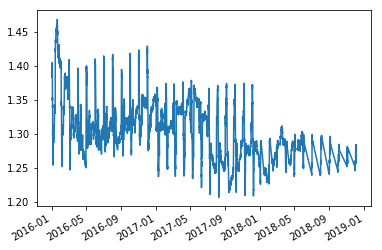

In [11]:
# Just some exploration 

df['Close'].plot()

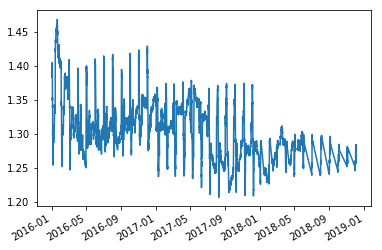

In [12]:
df_oil['Close_oil'].plot()

Let's create the variable we want to predict:

In [13]:
# Create return (open-close) normalized

df['return_next'] = df['Open'].shift(-1) - df['Close'].shift(-1)
return_range = df['return_next'].max() - df['return_next'].min()
df['return_next'] = df['return_next'] / return_range

df['return'] = df['Open'] - df['Close']
return_range = df['return'].max() - df['return'].min()
df['return'] = df['return'] / return_range

# If return > 0, green; otherwise, red

Now we can have the binary output:

In [14]:
# Make label, 1 as rising price, 0 as falling price - prediction for the following timestamp

df['label'] = df['return_next'].apply(lambda x: 1 if x>0.0 else 0)
df.tail(10)

,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return,label
2018-05-31 14:00:00,31.05.2018 14:00:00.000,1.29518,1.29770,1.29430,1.29718,9.841480e+09,2018-05-31 14:00:00,0.005464,-0.064288,1
2018-05-31 15:00:00,31.05.2018 15:00:00.000,1.29716,1.29903,1.29586,1.29699,1.169860e+10,2018-05-31 15:00:00,0.045002,0.005464,1
2018-05-31 16:00:00,31.05.2018 16:00:00.000,1.29699,1.29750,1.29555,1.29559,7.277670e+09,2018-05-31 16:00:00,-0.072324,0.045002,0
2018-05-31 17:00:00,31.05.2018 17:00:00.000,1.29560,1.29803,1.29424,1.29785,7.262840e+09,2018-05-31 17:00:00,0.071038,-0.072324,1
2018-05-31 18:00:00,31.05.2018 18:00:00.000,1.29785,1.29884,1.29538,1.29564,6.044530e+09,2018-05-31 18:00:00,-0.032144,0.071038,0
2018-05-31 19:00:00,31.05.2018 19:00:00.000,1.29566,1.29671,1.29541,1.29666,5.330320e+09,2018-05-31 19:00:00,0.033751,-0.032144,1
2018-05-31 20:00:00,31.05.2018 20:00:00.000,1.29668,1.29682,1.29502,1.29563,3.116830e+09,2018-05-31 20:00:00,-0.000321,0.033751,0
2018-05-31 21:00:00,31.05.2018 21:00:00.000,1.29563,1.29577,1.29498,1.29564,1.456650e+09,2018-05-31 21:00:00,0.049502,-0.000321,1
2018-05-31 22:00:00,31.05.2018 22:00:00.000,1.29563,1.29563,1.29407,1.29409,1.370330e+09,2018-05-31 22:00:00,-0.008679,0.049502,0
2018-05-31 23:00:00,31.05.2018 23:00:00.000,1.29409,1.29469,1.29406,1.29436,1.259850e+09,2018-05-31 23:00:00,NaN,-0.008679,0


Please, drop NaN:

In [15]:
df.dropna(inplace=True)
df.tail()

,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return,label
2018-05-31 18:00:00,31.05.2018 18:00:00.000,1.29785,1.29884,1.29538,1.29564,6.044530e+09,2018-05-31 18:00:00,-0.032144,0.071038,0
2018-05-31 19:00:00,31.05.2018 19:00:00.000,1.29566,1.29671,1.29541,1.29666,5.330320e+09,2018-05-31 19:00:00,0.033751,-0.032144,1
2018-05-31 20:00:00,31.05.2018 20:00:00.000,1.29668,1.29682,1.29502,1.29563,3.116830e+09,2018-05-31 20:00:00,-0.000321,0.033751,0
2018-05-31 21:00:00,31.05.2018 21:00:00.000,1.29563,1.29577,1.29498,1.29564,1.456650e+09,2018-05-31 21:00:00,0.049502,-0.000321,1
2018-05-31 22:00:00,31.05.2018 22:00:00.000,1.29563,1.29563,1.29407,1.29409,1.370330e+09,2018-05-31 22:00:00,-0.008679,0.049502,0


Let's make it simple:

In [16]:
df2 = df.copy()

df = df.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'label']]
df.tail()  

,Open,High,Low,Close,Volume,return,label
2018-05-31 18:00:00,1.29785,1.29884,1.29538,1.29564,6.044530e+09,0.071038,0
2018-05-31 19:00:00,1.29566,1.29671,1.29541,1.29666,5.330320e+09,-0.032144,1
2018-05-31 20:00:00,1.29668,1.29682,1.29502,1.29563,3.116830e+09,0.033751,0
2018-05-31 21:00:00,1.29563,1.29577,1.29498,1.29564,1.456650e+09,-0.000321,1
2018-05-31 22:00:00,1.29563,1.29563,1.29407,1.29409,1.370330e+09,0.049502,0


Then, make it one:

In [17]:
df = pd.concat([df,df_oil],axis=1, join='inner')
df.head() 

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2016-01-01 00:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0
2016-01-01 01:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0
2016-01-01 02:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0
2016-01-01 03:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0
2016-01-01 04:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0


## Creating more features


or *featuring engineering*

In [18]:
df['year'] = df.index.year 
df['month'] = df.index.month
df['day'] = df.index.day

df['hour'] = df.index.hour


df.head()

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2016-01-01 00:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,0
2016-01-01 01:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,1
2016-01-01 02:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,2
2016-01-01 03:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,3
2016-01-01 04:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,4


**Next step**: Make all these features dummy variables

In [19]:
df.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
return        float64
label           int64
Open_oil      float64
High_oil      float64
Low_oil       float64
Close_oil     float64
Volume_oil    float64
year            int64
month           int64
day             int64
hour            int64
dtype: object

## Choosing a timeframe to trade

Limiting the dataframe: from 3:00 to 12:00 (10 timestamps) 


In [20]:
df = df.between_time(include_start=True,include_end=True, start_time='03:00:00', end_time='12:00:00')
df.tail(12)

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-05-30 11:00:00,1.29863,1.29885,1.29705,1.29715,6.624660e+09,0.047573,0,1.29863,1.29885,1.29705,1.29715,6.624660e+09,2018,5,30,11
2018-05-30 12:00:00,1.29717,1.29863,1.29527,1.29781,1.067015e+10,-0.020572,0,1.29717,1.29863,1.29527,1.29781,1.067015e+10,2018,5,30,12
2018-05-31 03:00:00,1.28779,1.28788,1.28669,1.28719,2.857670e+09,0.019286,1,1.28779,1.28788,1.28669,1.28719,2.857670e+09,2018,5,31,3
2018-05-31 04:00:00,1.28719,1.28725,1.28647,1.28677,1.907510e+09,0.013500,1,1.28719,1.28725,1.28647,1.28677,1.907510e+09,2018,5,31,4
2018-05-31 05:00:00,1.28677,1.28707,1.28598,1.28673,3.887940e+09,0.001286,0,1.28677,1.28707,1.28598,1.28673,3.887940e+09,2018,5,31,5
2018-05-31 06:00:00,1.28678,1.28758,1.28654,1.28734,6.998760e+09,-0.018001,1,1.28678,1.28758,1.28654,1.28734,6.998760e+09,2018,5,31,6
2018-05-31 07:00:00,1.28735,1.28747,1.28452,1.28482,7.630360e+09,0.081324,1,1.28735,1.28747,1.28452,1.28482,7.630360e+09,2018,5,31,7
2018-05-31 08:00:00,1.28484,1.28538,1.28356,1.28400,5.385360e+09,0.027001,0,1.28484,1.28538,1.28356,1.28400,5.385360e+09,2018,5,31,8
2018-05-31 09:00:00,1.28400,1.28539,1.28394,1.28470,5.552970e+09,-0.022501,1,1.28400,1.28539,1.28394,1.28470,5.552970e+09,2018,5,31,9
2018-05-31 10:00:00,1.28472,1.28583,1.28180,1.28259,5.881380e+09,0.068467,0,1.28472,1.28583,1.28180,1.28259,5.881380e+09,2018,5,31,10


## Train and Test datasets

Separate the dataframe into train and test datasets

In [21]:
df_train = df.loc[:'2018-05-30',:] 
display(df_train.head())
display(df_train.tail())

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2016-01-01 03:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,3
2016-01-01 04:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,4
2016-01-01 05:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,5
2016-01-01 06:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,6
2016-01-01 07:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,7


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-05-30 08:00:00,1.30152,1.30161,1.30047,1.30047,7.426750e+09,0.033751,1,1.30152,1.30161,1.30047,1.30047,7.426750e+09,2018,5,30,8
2018-05-30 09:00:00,1.30047,1.30049,1.29931,1.29958,7.103510e+09,0.028608,1,1.30047,1.30049,1.29931,1.29958,7.103510e+09,2018,5,30,9
2018-05-30 10:00:00,1.29959,1.29999,1.29813,1.29861,8.318910e+09,0.031501,1,1.29959,1.29999,1.29813,1.29861,8.318910e+09,2018,5,30,10
2018-05-30 11:00:00,1.29863,1.29885,1.29705,1.29715,6.624660e+09,0.047573,0,1.29863,1.29885,1.29705,1.29715,6.624660e+09,2018,5,30,11
2018-05-30 12:00:00,1.29717,1.29863,1.29527,1.29781,1.067015e+10,-0.020572,0,1.29717,1.29863,1.29527,1.29781,1.067015e+10,2018,5,30,12


Separate the dataframe into train and test datasets

In [22]:
df_test = df.loc['2018-05-31' ,:]  
display(df_test.head())
display(df_test.tail())

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-05-31 03:00:00,1.28779,1.28788,1.28669,1.28719,2.857670e+09,0.019286,1,1.28779,1.28788,1.28669,1.28719,2.857670e+09,2018,5,31,3
2018-05-31 04:00:00,1.28719,1.28725,1.28647,1.28677,1.907510e+09,0.013500,1,1.28719,1.28725,1.28647,1.28677,1.907510e+09,2018,5,31,4
2018-05-31 05:00:00,1.28677,1.28707,1.28598,1.28673,3.887940e+09,0.001286,0,1.28677,1.28707,1.28598,1.28673,3.887940e+09,2018,5,31,5
2018-05-31 06:00:00,1.28678,1.28758,1.28654,1.28734,6.998760e+09,-0.018001,1,1.28678,1.28758,1.28654,1.28734,6.998760e+09,2018,5,31,6
2018-05-31 07:00:00,1.28735,1.28747,1.28452,1.28482,7.630360e+09,0.081324,1,1.28735,1.28747,1.28452,1.28482,7.630360e+09,2018,5,31,7


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-05-31 08:00:00,1.28484,1.28538,1.28356,1.28400,5.385360e+09,0.027001,0,1.28484,1.28538,1.28356,1.28400,5.385360e+09,2018,5,31,8
2018-05-31 09:00:00,1.28400,1.28539,1.28394,1.28470,5.552970e+09,-0.022501,1,1.28400,1.28539,1.28394,1.28470,5.552970e+09,2018,5,31,9
2018-05-31 10:00:00,1.28472,1.28583,1.28180,1.28259,5.881380e+09,0.068467,0,1.28472,1.28583,1.28180,1.28259,5.881380e+09,2018,5,31,10
2018-05-31 11:00:00,1.28264,1.28514,1.28251,1.28474,6.608530e+09,-0.067502,0,1.28264,1.28514,1.28251,1.28474,6.608530e+09,2018,5,31,11
2018-05-31 12:00:00,1.28474,1.28987,1.28472,1.28985,1.079586e+10,-0.164256,0,1.28474,1.28987,1.28472,1.28985,1.079586e+10,2018,5,31,12


In [23]:
df_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'label', 'Open_oil',
       'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil', 'year', 'month',
       'day', 'hour'],
      dtype='object')

## Applying machine learning models

Separate **features** and **output** ( X and y ) and create **test** and **train** datasets

In [24]:
y_train = df_train['label']
X_train = df_train.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'Open_oil', 'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil',
       'year', 'month', 'day', 'hour']]

y_test = df_test['label']
X_test = df_test.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'Open_oil', 'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil',
       'year', 'month', 'day', 'hour']]


Let's take a look at our **test** and **train** datasets:

In [25]:
print(X_test.shape)
print(y_test.shape)

print('%% of Class0 : %f y_test' % (np.count_nonzero(y_test == 0)/float(len(y_test))))
print('%% of Class1 : %f y_test' % (np.count_nonzero(y_test == 1)/float(len(y_test))))

(10, 15)
(10,)
% of Class0 : 0.500000 y_test
% of Class1 : 0.500000 y_test


In [26]:
print(X_train.shape)
print(y_train.shape)

print('%% of Class0 : %f y_train' % (np.count_nonzero(y_train == 0)/float(len(y_train))))
print('%% of Class1 : %f y_train' % (np.count_nonzero(y_train == 1)/float(len(y_train))))

(6040, 15)
(6040,)
% of Class0 : 0.513742 y_train
% of Class1 : 0.486258 y_train


Choose a model (or some models) and **fit**

In [27]:
clf_gb = GradientBoostingClassifier(verbose=3)

clf_gb.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3840            0.77s
         2           1.3827            0.66s
         3           1.3815            0.61s
         4           1.3805            0.65s
         5           1.3796            0.63s
         6           1.3786            0.61s
         7           1.3777            0.62s
         8           1.3769            0.60s
         9           1.3756            0.59s
        10           1.3749            0.59s
        11           1.3734            0.60s
        12           1.3725            0.59s
        13           1.3713            0.60s
        14           1.3704            0.58s
        15           1.3695            0.57s
        16           1.3687            0.57s
        17           1.3674            0.57s
        18           1.3664            0.56s
        19           1.3655            0.55s
        20           1.3651            0.54s
        21           1.3648            0.53s
        2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=3, warm_start=False)

In [28]:
clf_rf = RandomForestClassifier(n_estimators=1000, max_depth=15,
                            random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## How accurate are these models?

In [29]:
accuracy_gb = clf_gb.score(X_train, y_train)
print('Testing Accuracy for Gradient Booster: %f' % accuracy_gb)

Testing Accuracy for Gradient Booster: 0.630298


In [30]:
accuracy_rf = clf_rf.score(X_train, y_train)
print('Testing Accuracy for Random Forest: %f' % accuracy_rf)

# prepare yourself for the output, it's impressive!

Testing Accuracy for Random Forest: 0.973179


**Next step:** let computers do their homework applying an *AutoML* !

Predict test data

In [31]:
pred_gb = clf_gb.predict(X_test)

In [32]:
pred_rf = clf_rf.predict(X_test)

Compare predicted and label

In [33]:
df_trade = pd.DataFrame(X_test)
df_trade['label']   = y_test

df_trade['pred_gb'] = pred_gb
df_trade['pred_rf'] = pred_rf

df_trade['won_gb']  = df_trade['label'] == df_trade['pred_gb']
df_trade['won_rf']  = df_trade['label'] == df_trade['pred_rf']

df_trade.loc[:, ['label', 'pred_gb', 'pred_rf', 'won_gb', 'won_rf']]

,label,pred_gb,pred_rf,won_gb,won_rf
2018-05-31 03:00:00,1,0,0,False,False
2018-05-31 04:00:00,1,0,0,False,False
2018-05-31 05:00:00,0,0,0,True,True
2018-05-31 06:00:00,1,1,1,True,True
2018-05-31 07:00:00,1,1,1,True,True
2018-05-31 08:00:00,0,0,0,True,True
2018-05-31 09:00:00,1,0,0,False,False
2018-05-31 10:00:00,0,0,0,True,True
2018-05-31 11:00:00,0,0,0,True,True
2018-05-31 12:00:00,0,1,1,False,False


Didnt win and won

In [35]:
print(df_trade[df_trade['won_gb'] == False]['won_gb'].count())
print(df_trade[df_trade['won_gb'] == True]['won_gb'].count())

4
6


In [36]:
print(df_trade[df_trade['won_rf'] == False]['won_rf'].count())
print(df_trade[df_trade['won_rf'] == True]['won_rf'].count())

4
6


% of won

In [37]:
df_trade[df_trade['won_gb'] == True]['won_gb'].count()/df_trade['won_gb'].count()

0.6

In [38]:
df_trade[df_trade['won_rf'] == True]['won_rf'].count()/df_trade['won_rf'].count()

0.6

# Thank y'all! 

**Ianca <3 Python**